In [1]:
# quick hack to fix import path
# import sys; sys.path.append('/Users/julianalverio/code/conda/envs/sac/lib/python3.6/site-packages/')

# data manipulation
import pandas as pd
import numpy as np
import json

# plots
%matplotlib inline
import random
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl

# scaling algorithms
from sklearn.preprocessing import StandardScaler 

# dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# cross-validation
from sklearn.model_selection import train_test_split
from sklearn import model_selection

# text features
import re
from nltk import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# model evaluation
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

import os

os.chdir('c:\\users\\Gabriel')

In [2]:
recetas_csv=[]

def leer_recetas_json (archivo,recetas):
    with open(archivo) as json_file:
        bruto = json.load(json_file)
    for receta in bruto:
        ing=[]
        if receta['nutr_values_per100g']['energy']>60:
            ing.append(receta['title'])
            for ingrediente in receta['ingredients']:
                ing.append(ingrediente['text'].split(',')[0])
            recetas.append(ing)
# Unlimited!!!
#        if len(recetas)==1000:
#            break

leer_recetas_json ("recipes.json",recetas_csv)

In [3]:
recetas_csv[0]

['Yogurt Parfaits', 'yogurt', 'strawberries', 'cereals ready-to-eat']

In [4]:
url_vec = []
titulos = []
for receta in recetas_csv:
    ingredientes=''
    titulo=1
    for ingrediente in receta:
        if titulo:
            ## guardo el título de la receta en otra lista
            titulos.append(ingrediente.lower())
            titulo=0
        else:
            ## uno los ingredientes y los paso a la lista
            ingredientes+=ingrediente.lower()
            ingredientes+=' '
    url_vec.append(ingredientes[:-1]) 

In [5]:
recetas = pd.Series(url_vec)

In [6]:
type(recetas)

pandas.core.series.Series

In [7]:
# TFIDF add in the text features with tfidf
unigram_dtm = CountVectorizer(min_df= 10,  max_features= 1000, strip_accents= "unicode",
                          ngram_range=(1, 1))
unigram_dtm.fit(recetas)
data_text = unigram_dtm.transform(recetas)

In [8]:
# Vista de los features
np.random.choice(unigram_dtm.get_feature_names(), 10)

array(['denny', 'sauerkraut', 'villaggio', 'bran', 'chocolate', 'candies',
       'salt', 'sweet', 'croutons', 'relish'], dtype='<U13')

In [9]:
superNombreDedicado_a_Lyl = data_text.toarray()

In [10]:
superNombreDedicado_a_Lyl

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
# K Means
kmeans = KMeans(n_clusters=4).fit(superNombreDedicado_a_Lyl)
centroidsPCA = kmeans.cluster_centers_

In [12]:
# PCA
ahoraDedicado_a_Hector = PCA(n_components = 2)
VariableParaSebastian = ahoraDedicado_a_Hector.fit_transform(superNombreDedicado_a_Lyl) # fit to the data and transform it in one line (no need to do them separately)
LaFinalEsDeCamila = pd.DataFrame(data=VariableParaSebastian, columns=['PC1', 'PC2']) # convert to dataframe for visualization

In [13]:
LaFinalEsDeCamila

,PC1,PC2
0,-0.644618,-0.977932
1,-0.963788,0.891915
2,1.639565,-0.274405
3,-0.487679,-1.154265
4,-0.738936,-0.806200
...,...,...
45667,2.901295,0.715213
45668,-0.679867,-0.970901
45669,-0.898886,0.722055
45670,0.313703,-0.783394


In [27]:
titulines=['raspberries with knepp','cheesy potato loaf (bread machine)','cheese straws','homemmade ice magic','yogurt parfaits','salmon with vegetables','curry chilli sauce','chicken and rice baby food','italian herb grilled chicken','rub a dub-dub']

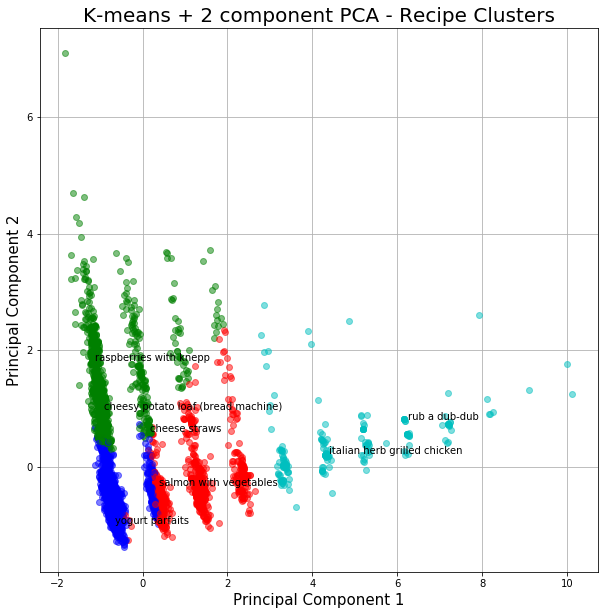

In [28]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('K-means + 2 component PCA - Recipe Clusters', fontsize = 20)
colors = ['bo','go','ro','co','mo']
etiquetados=[0,0,0,0,0]
for i in range(4000): #limito puntos a 4000
    x = LaFinalEsDeCamila['PC1'][i]
    y = LaFinalEsDeCamila['PC2'][i]
    cluster = kmeans.labels_[i].astype(int)
    c = colors[cluster]
    ax.plot(x,y,c,alpha=0.5)
    if i%31==0 and titulos[i] in titulines:
        if etiquetados[cluster]<3:
            ax.text(x * (1 + 0.01), y * (1 + 0.01) , titulos[i], fontsize=10)
            etiquetados[cluster]+=1
ax.grid()